In [125]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [126]:
jfk = pd.read_csv('M1_final.csv') #load the data
jfk.head() #display the first 5 rows of the data

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [127]:
jfk.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [128]:
#statistics summary
jfk.describe() 

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [129]:
jfk.dropna(inplace=True) #drop the missing values
wind_dict = {'NNW': 340, 'CALM': 0, 'NNE':20, 'NE':45, 'VAR':0, 'WSW':230, 'S':180, 'SSW':200, 'WNW':290, 'ESE':115, 'N': 360, 'SW':225, 'E':90, 'W':270, 'SSE':155, 'ENE':70, 'NW':315, 'SE':135}
#change the wind direction to numerical data
for item in wind_dict:
    jfk.loc[jfk['Wind'] == item, "Wind"] = wind_dict[item]
#change other objects to numerical data
jfk['TAIL_NUM'] = jfk['TAIL_NUM'].astype('category').cat.codes
jfk['OP_UNIQUE_CARRIER'] = jfk['OP_UNIQUE_CARRIER'].astype('category').cat.codes
jfk['DEST'] = jfk['DEST'].astype('category').cat.codes
#create mapping to retreive original values
carrier_mapping = dict(enumerate(jfk['OP_UNIQUE_CARRIER'].astype('category').cat.categories))
tail_num_mapping = dict(enumerate(jfk['TAIL_NUM'].astype('category').cat.categories))
destination_mapping = dict(enumerate(jfk['DEST'].astype('category').cat.categories))
#change to integer
jfk['Dew Point'] = jfk['Dew Point'].astype('int')
jfk['Wind'] = jfk['Wind'].astype('int')

In [130]:
jfk.describe() #check the updated data

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,...,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,7.893955,16.020890,4.008953,2.828441,1024.952877,31.019224,6.373239,225.294399,1267.787494,830.970470,...,41.491047,30.422236,57.732806,223.581963,12.368485,5.535707,30.092410,31.091956,28.431813,20.857207
std,4.991779,8.750448,1.985299,1.865352,656.024007,18.727287,38.735195,119.483432,889.354031,299.381938,...,8.042493,12.313335,23.469480,106.391825,6.258667,11.886780,0.296158,9.510317,8.263242,6.850197
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-22.000000,57.000000,94.000000,301.000000,...,17.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,1.000000,403.000000,15.000000,-6.000000,124.000000,483.000000,545.000000,...,36.000000,23.000000,46.000000,180.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,3.000000,1036.000000,28.000000,-3.000000,188.000000,1029.000000,856.000000,...,42.000000,31.000000,59.000000,230.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,4.000000,1615.000000,48.000000,2.000000,365.000000,2248.000000,1095.000000,...,47.000000,39.000000,74.000000,315.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,8.000000,2091.000000,64.000000,1276.000000,697.000000,4983.000000,1439.000000,...,68.000000,67.000000,97.000000,360.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [131]:
#Correlation Matrix
corr_matrix = jfk.corr(numeric_only= True)
corr_matrix


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007274,0.029366,0.015596,-0.004154,0.007022,0.046421,-0.016010,-0.000106,0.001732,...,0.135832,0.135151,0.012522,-0.016805,-0.034989,-0.050989,-0.085342,-0.006131,-0.019737,0.018347
DAY_OF_MONTH,-0.007274,1.000000,-0.029732,0.014115,0.001003,0.004872,-0.036634,0.002779,-0.002746,0.001717,...,-0.132428,-0.040094,0.096218,-0.018511,-0.093178,-0.088981,0.016845,-0.003392,0.002210,-0.024065
DAY_OF_WEEK,0.029366,-0.029732,1.000000,0.008258,-0.001776,0.006176,-0.006204,0.000413,0.002450,0.005412,...,0.013082,-0.073823,0.001627,-0.093698,0.095956,0.127689,0.102294,0.024416,0.009622,0.028397
OP_UNIQUE_CARRIER,0.015596,0.014115,0.008258,1.000000,-0.006938,-0.010088,0.006017,0.049515,0.061987,0.010447,...,0.022647,0.015751,0.000115,0.000229,-0.004742,-0.001228,-0.009184,0.050508,0.008926,0.008845
TAIL_NUM,-0.004154,0.001003,-0.001776,-0.006938,1.000000,0.134239,-0.013445,0.086161,0.091836,0.026012,...,-0.008446,0.000255,0.006887,0.006401,0.002404,0.000305,-0.002838,-0.006697,-0.007873,-0.017807
DEST,0.007022,0.004872,0.006176,-0.010088,0.134239,1.000000,-0.012099,0.355462,0.366625,-0.031555,...,-0.012308,0.007599,0.009411,-0.009673,-0.007559,-0.005507,0.002684,0.060580,-0.050524,0.076600
DEP_DELAY,0.046421,-0.036634,-0.006204,0.006017,-0.013445,-0.012099,1.000000,-0.030862,-0.031501,0.102330,...,-0.032169,0.000062,-0.011771,0.035835,0.067819,0.044363,-0.064993,-0.065409,-0.006974,0.034759
CRS_ELAPSED_TIME,-0.016010,0.002779,0.000413,0.049515,0.086161,0.355462,-0.030862,1.000000,0.994465,-0.031249,...,-0.016166,0.007161,0.017192,-0.004271,-0.013545,-0.011959,0.010223,0.083376,-0.067643,0.071007
DISTANCE,-0.000106,-0.002746,0.002450,0.061987,0.091836,0.366625,-0.031501,0.994465,1.000000,-0.040889,...,-0.010026,0.009712,0.015105,-0.005147,-0.010828,-0.009544,0.005744,0.059129,-0.088771,0.060006
CRS_DEP_M,0.001732,0.001717,0.005412,0.010447,0.026012,-0.031555,0.102330,-0.031249,-0.040889,1.000000,...,0.086636,0.001763,0.003857,0.087147,0.008286,-0.009836,-0.008409,-0.025506,0.495274,0.044562


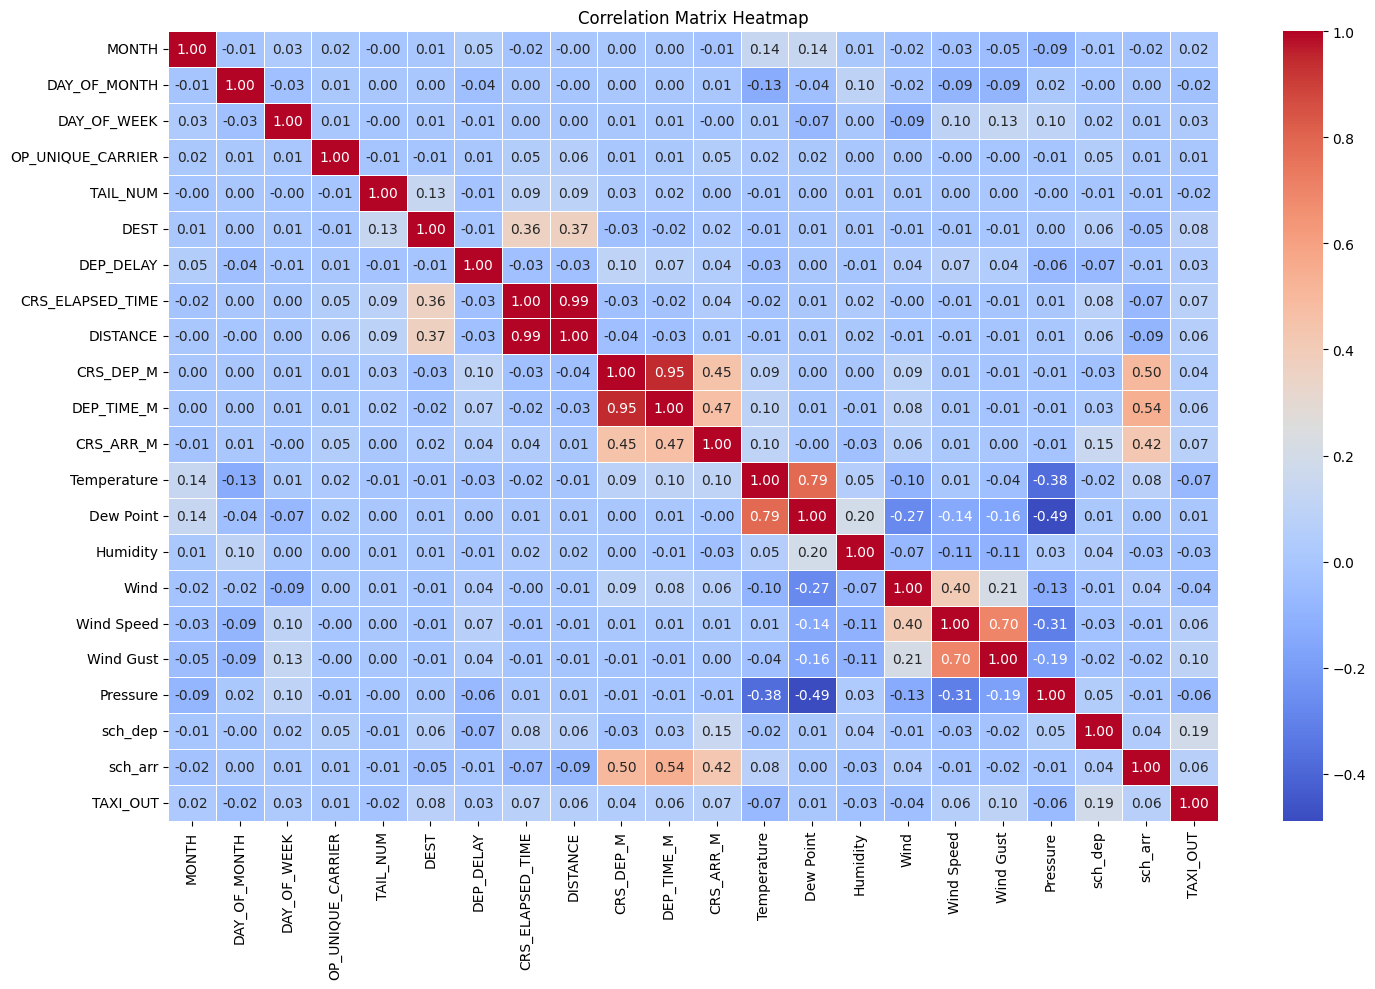

In [132]:
#Heatmap to show the correlation between the variables
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [133]:
#Setting variables for the linear regression
X = jfk[['sch_dep']] #independent variable
y = jfk['TAXI_OUT'] #dependent variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)

In [134]:
X_train #showing the training data

,sch_dep
5145,25
11660,50
17346,41
1966,52
26036,30
...,...
20416,30
27518,37
9526,19
9771,11


In [135]:
X_test #showing the testing data

,sch_dep
9360,36
20390,31
16151,35
26927,19
2007,30
...,...
376,36
10920,30
13605,32
2829,40


In [136]:
#Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train) #training the model
y_pred = linear_regression.predict(X_test)

pd.DataFrame({'Actual': y_test, 'Predicted':y_pred}) #comparing the actual and predicted values in a data frame

,Actual,Predicted
9360,21,21.532623
20390,19,20.846468
16151,17,21.395392
26927,19,19.199696
2007,20,20.709237
...,...,...
376,16,21.532623
10920,31,20.709237
13605,15,20.983699
2829,19,22.081546


In [137]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #calculating the error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #calculating the root mean squared error
print('R Squared:', metrics.r2_score(y_test, y_pred)) #calculating the r squared value

Mean Absolute Error: 5.353282616449878
Mean Squared Error: 45.10840350858983
Root Mean Squared Error: 6.716278992760041
R Squared: 0.035684508713330176


In [ ]:
#Summary: Linear regression is not a good way to predict taxi out from schedualed departure

In [138]:
#Setting variables for the linear regression
X = jfk[['CRS_ELAPSED_TIME']] #independent variable
y = jfk['DISTANCE'] #dependent variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)


In [139]:
X_train #showing the training data

,CRS_ELAPSED_TIME
5145,134
11660,232
17346,170
1966,140
26036,175
...,...
20416,81
27518,109
9526,114
9771,124


In [140]:
X_test #showing the testing data

,CRS_ELAPSED_TIME
9360,362
20390,397
16151,263
26927,125
2007,175
...,...
376,184
10920,102
13605,393
2829,387


In [141]:
#Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train) #training the model
y_pred = linear_regression.predict(X_test)

pd.DataFrame({'Actual Distance': y_test, 'Predicted Distance':y_pred}) #comparing the actual and predicted values in a data frame

,Actual Distance,Predicted Distance
9360,2378,2280.175926
20390,2465,2539.355705
16151,1521,1547.067409
26927,541,525.158565
2007,944,895.415393
...,...,...
376,1041,962.061622
10920,264,354.840425
13605,2422,2509.735159
2829,2475,2465.304340


In [142]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #calculating the error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #calculating the root mean squared error
print('R Squared:', metrics.r2_score(y_test, y_pred)) #calculating the r squared value

Mean Absolute Error: 66.98372715180972
Mean Squared Error: 8460.046223816667
Root Mean Squared Error: 91.97850957596926
R Squared: 0.9893086175428984


In [143]:
#Summary: linear regression is a good way to predict distance based on the elapsed time of the flight.